In [1]:
# Importing the libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Setting the manual seed for torch
torch.manual_seed(0)

# Loading MNIST dataset for training and testing
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Printing the size of the train and test datasets
print("train_dataset size:", len(train_dataset),"\ntest_dataset size:", len(test_dataset))


train_dataset size: 60000 
test_dataset size: 10000


In [3]:
# Create a DataLoader object for the training dataset
# Parameters:
# batch_size: the number of samples to include in each batch
# shuffle: whether to shuffle the samples before creating batches
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=600, 
                                           shuffle=True)

# Create a DataLoader object for the test dataset
# Parameters:
# batch_size: the number of samples to include in each batch
# shuffle: whether to shuffle the samples before creating batches (set to False as we don't want to shuffle the test data)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=100, 
                                          shuffle=False)

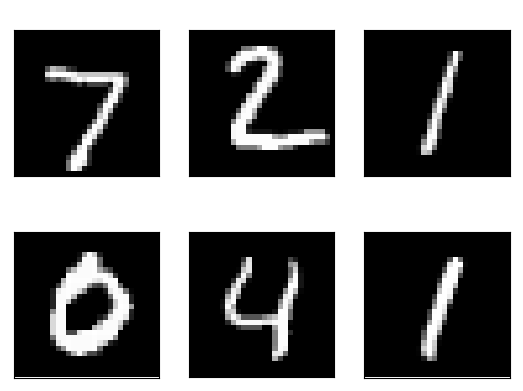

In [4]:
# Get an iterator object from the test loader
examples = iter(test_loader)

# Get the next batch of data and target values
example_data, example_targets = next(examples)

# Plot 6 images from the batch
for i in range(6):
    # Create a subplot for each image
    plt.subplot(2,3,i+1)
    
    # Plot the image
    plt.imshow(example_data[i][0], cmap='gray')
    
    # Set the title to the actual target value of the image
    plt.title("Actual Val: {}".format(example_targets[i]),color='white')
    
    # Remove the x-axis and y-axis ticks
    plt.xticks([])
    plt.yticks([])

# Show the plot
plt.show()


In [5]:
class CNN1(nn.Module):
    def __init__(self,):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(320, 50) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(50, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN   
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))        #Fully Connected NN           
        x = self.fc3(x)                #O/P Layer       
        return x


In [6]:
def trainFunc(model, num_epochs):
    # Set the model to training mode
    model.train()
    
    # Calculate the number of steps in one epoch
    n_total_steps = len(train_loader)
    
    # Lists to store the training loss, epochs and accuracy
    train_losses = []
    train_epoch = []
    train_acc = []
    
    # Flag to check if convergence has been reached
    not_converged = True
    
    # Start epoch count from 0
    epoch = 0
    
    # List to store the average loss per epoch
    trainAvgLossArr = []
    
    # Loop until convergence is reached or max number of epochs is reached
    while not_converged:
        # Increment the epoch count
        epoch += 1
        
        # Initialize the number of correctly classified samples and total number of samples
        n_correct = 0
        n_samples = 0
        
        # Initialize the loss sum
        lossSum = 0

        # Loop through the data in the training loader
        for i, (images, labels) in enumerate(train_loader):  
            # Forward pass
            prediction = model(images)
            loss = loss_func(prediction, labels)
            # Sum up the loss for each iteration
            lossSum += loss.detach().numpy()
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Get the predicted class
            _, predicted = torch.max(prediction.data, 1)
            
            # Increment the number of samples
            n_samples += labels.size(0)
            
            # Increment the number of correct predictions
            n_correct += (predicted == labels).sum().item()
            
            # Calculate the accuracy
            acc = 100.0 * n_correct / n_samples

            # Print the loss and accuracy for every 100 iterations
            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}',end='\r',flush=True)
                # Store the current epoch and loss
                train_epoch.append(epoch)
                train_losses.append(loss.item())
                print(f'Epoch [{epoch}/{num_epochs}], Accuracy : {acc} %',end='\r',flush=True)
                # Store the current accuracy
                train_acc.append(acc)
                
                # Check if max number of epochs has been reached
                if epoch == num_epochs:
                    print(f"Max Epoch Reached, Loss: {loss.item():.4f}, Accuracy:{acc:2f}%")
                    not_converged = False
                
                # Check if convergence has been reached
                elif (epoch > 5) and  (train_losses[-1] < 0.001):
                    # Check if the loss is not changing by more than 1.0e-05
                    
                    if abs(train_losses[-3] - train_losses[-2]) < 1.0e-05 and abs(train_losses[-2] - train_losses[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",train_losses[-1])
                        not_converged = False

        trainAvgLossArr.append(lossSum/i+1)
        
                        
    return train_epoch,train_losses,train_acc,trainAvgLossArr

In [7]:
# Hyper-parameters 
input_size = 784 # 28x28
max_epochs = 15
learning_rate = 0.001
kernel_size = 4
weight_decay_val = 1e-4
dropout = 0.25

In [8]:
torch.manual_seed(0)

cnn1 = CNN1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn1.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

a=[]
for i in cnn1.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 1:', np.sum(a),)

Total no of parameters in Model 1: 25550


In [9]:
train_epoch,train_losses,train_acc,trainAvgLossArr =trainFunc(cnn1,max_epochs)

Max Epoch Reached, Loss: 0.1031, Accuracy:98.088333%


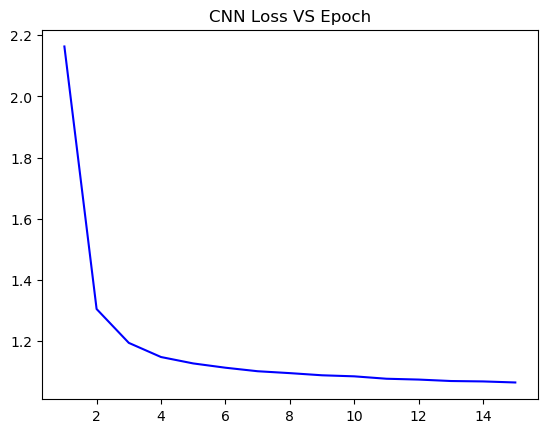

In [10]:
# Plot the training loss against the number of epochs
plt.plot(train_epoch, trainAvgLossArr, color="blue")

# Set the title of the plot
plt.title('CNN Loss VS Epoch')

# Display the plot
plt.show()

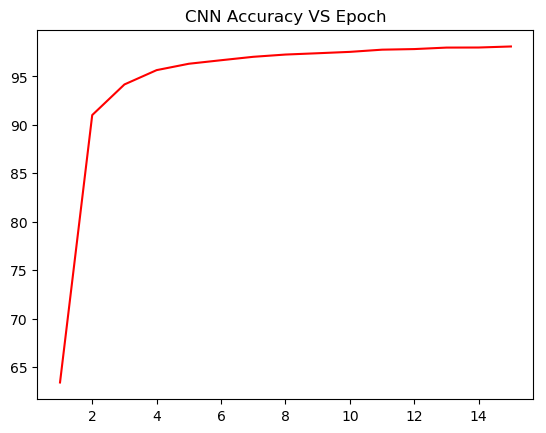

In [11]:
import matplotlib.pyplot as plt

# Plot the training accuracy against the number of epochs
plt.plot(train_epoch, train_acc, color="red")

# Set the title of the plot
plt.title('CNN Accuracy VS Epoch')

# Display the plot
plt.show()


In [12]:
def testFunc(model):
    # Set the model to evaluation mode
    model.eval()

    # Turn off gradient calculation to speed up the testing process
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        n_class_correct = [0 for i in range(10)]
        n_class_samples = [0 for i in range(10)]
        # Iterate through the test data
        for test_images, test_labels in test_loader:
            # Pass the test images through the model
            outputs = model(test_images)
            # Get the index of the maximum value in the outputs
            _, predicted = torch.max(outputs, 1)
            # Increment the number of samples
            n_samples += test_labels.size(0)
            # Increment the number of correct predictions
            n_correct += (predicted == test_labels).sum().item()

            # Keep track of class-wise accuracy
            for i in range(100):
                label = test_labels[i]
                pred = predicted[i]
                if (label == pred):
                    n_class_correct[label] += 1
                n_class_samples[label] += 1

        # Calculate the overall accuracy of the model
        netTest_acc1 = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network: {netTest_acc1} %')

        # Print the class-wise accuracy of the model
        for i in range(10):
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
            print(f'Accuracy of {i}: {acc} %')

    return netTest_acc1


In [13]:
cnn1TestAcc = testFunc(cnn1)

Accuracy of the network: 98.78 %
Accuracy of 0: 99.48979591836735 %
Accuracy of 1: 99.55947136563877 %
Accuracy of 2: 99.32170542635659 %
Accuracy of 3: 98.91089108910892 %
Accuracy of 4: 98.98167006109979 %
Accuracy of 5: 97.98206278026906 %
Accuracy of 6: 98.74739039665971 %
Accuracy of 7: 99.0272373540856 %
Accuracy of 8: 98.04928131416838 %
Accuracy of 9: 97.52229930624381 %


In [14]:
class CNN2(nn.Module):
    def __init__(self,):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size) #1st Convolution
        self.pool = nn.MaxPool2d(2, 2)   #pool_size=2, strides=2 
        self.conv2 = nn.Conv2d(10, 20, kernel_size) #2nd Convolution
        self.fc1 = nn.Linear(20*kernel_size*kernel_size, 50) #((I/P - Filter + 2*Pad)/Stride)+1 
        self.fc2 = nn.Linear(50,50)
        self.fc3 = nn.Linear(50,40)
        self.fc4 = nn.Linear(40,30)
        self.fc5 = nn.Linear(30, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            #Flattening 
        x = F.relu(self.fc1(x))        #Fully Connected NN       
        x = F.relu(self.fc2(x))        #Fully Connected NN 
        x = F.relu(self.fc3(x))        #Fully Connected NN 
        x = F.relu(self.fc4(x))        #Fully Connected NN
        #x = F.relu(self.fc5(x))        #Fully Connected NN 
        x = self.fc5(x)                #O/P Layer       
        return x



In [15]:
# Set the random seed for reproducibility
torch.manual_seed(0)

# Create an instance of the CNN2 model
cnn2 = CNN2()

# Define the loss function as cross-entropy loss
loss_func = nn.CrossEntropyLoss()

# Define the optimizer as Adam optimizer with specified learning rate and weight decay value
optimizer = torch.optim.Adam(cnn2.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

# Create an empty list to store the number of parameters in each layer of the model
a = []

# Loop over all the parameters of the model
for i in cnn2.parameters():
    # Calculate the number of parameters in each layer and append it to the list
    a.append(torch.numel(i))

# Print the total number of parameters in the model
print('Total no of parameters in Model 2:', np.sum(a))

Total no of parameters in Model 2: 25570


In [16]:
train_epoch2,train_losses2,train_acc2,trainAvgLossArr2=trainFunc(cnn2,max_epochs)

Max Epoch Reached, Loss: 0.0925, Accuracy:97.933333%


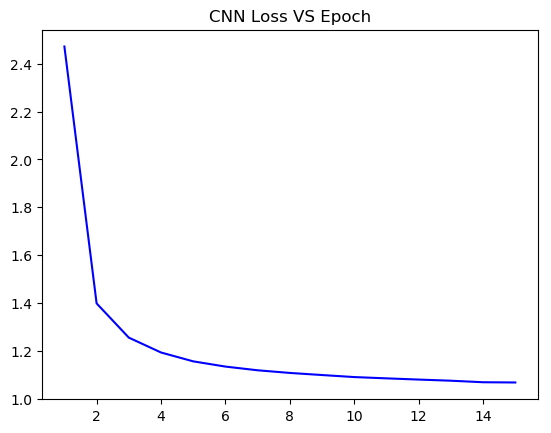

In [17]:
#plot
plt.plot(train_epoch2,trainAvgLossArr2,color="blue")
plt.title('CNN Loss VS Epoch')
plt.show()

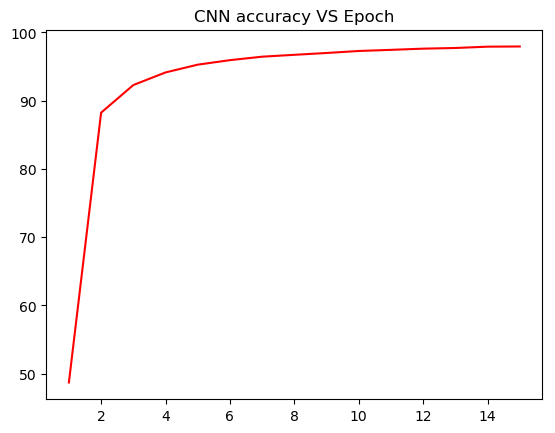

In [18]:
#plot
plt.plot(train_epoch2,train_acc2,color="red")
plt.title('CNN accuracy VS Epoch')
plt.show()

In [19]:
cnn2TestAcc = testFunc(cnn2)

Accuracy of the network: 97.92 %
Accuracy of 0: 99.08163265306122 %
Accuracy of 1: 99.11894273127753 %
Accuracy of 2: 97.67441860465117 %
Accuracy of 3: 98.91089108910892 %
Accuracy of 4: 97.55600814663951 %
Accuracy of 5: 98.20627802690584 %
Accuracy of 6: 96.97286012526096 %
Accuracy of 7: 97.76264591439688 %
Accuracy of 8: 97.43326488706366 %
Accuracy of 9: 96.33300297324084 %


In [20]:
›


In [21]:
torch.manual_seed(0)

cnn3 = CNN3()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn3.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

a=[]

for i in cnn3.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 3:', np.sum(a))

Total no of parameters in Model 3: 25621


In [22]:
train_epoch3,train_losses3,train_acc3,trainAvgLossArr3=trainFunc(cnn3,max_epochs)


Max Epoch Reached, Loss: 0.0351, Accuracy:98.826667%


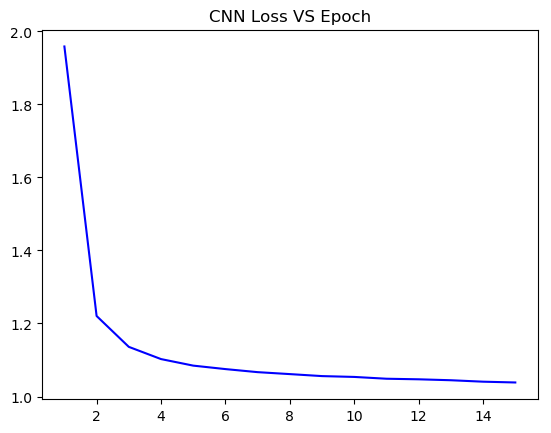

In [23]:
# Plot the training loss against the number of epochs
plt.plot(train_epoch3, trainAvgLossArr3, color="blue")

# Add a title to the plot
plt.title('CNN Loss VS Epoch')

# Show the plot
plt.show()

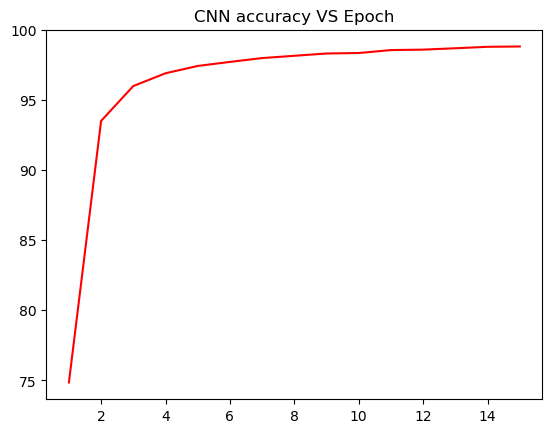

In [24]:
# Plot the training accuracy against the number of epochs
plt.plot(train_epoch3, train_acc3, color="red")

# Add a title to the plot
plt.title('CNN accuracy VS Epoch')

# Show the plot
plt.show()


In [25]:
cnn3TestAcc = testFunc(cnn3)

Accuracy of the network: 98.94 %
Accuracy of 0: 99.08163265306122 %
Accuracy of 1: 99.55947136563877 %
Accuracy of 2: 99.03100775193798 %
Accuracy of 3: 99.20792079207921 %
Accuracy of 4: 99.4908350305499 %
Accuracy of 5: 99.10313901345292 %
Accuracy of 6: 99.06054279749478 %
Accuracy of 7: 99.12451361867704 %
Accuracy of 8: 98.66529774127311 %
Accuracy of 9: 97.02675916749257 %


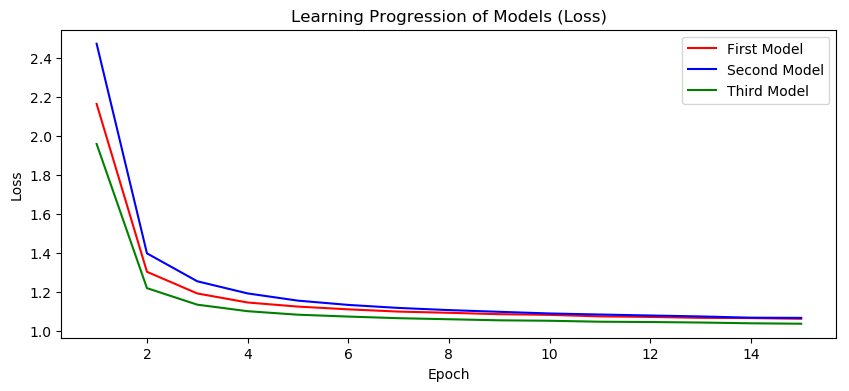

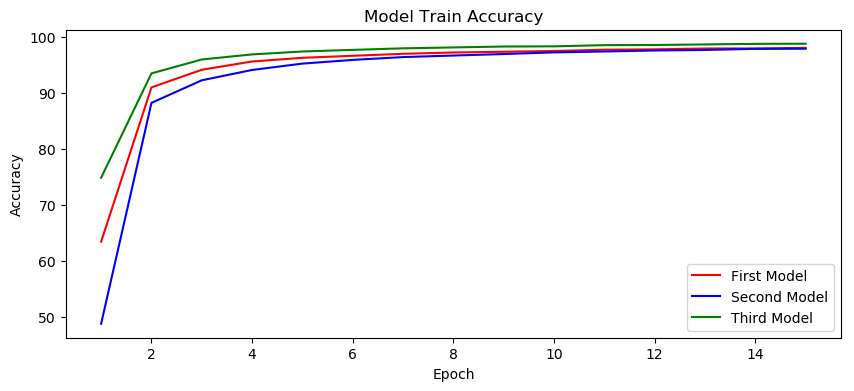

CNN1 Test Accuracy: 98.78 %
CNN2 Test Accuracy: 97.92 %
CNN3 Test Accuracy: 98.94 %


In [26]:
# Plot the learning progression of the first, second, and third models in terms of loss on the same figure
plt.figure(figsize=(10,4))
plt.plot(train_epoch, trainAvgLossArr, color = "red")
plt.plot(train_epoch2, trainAvgLossArr2, color = "blue")
plt.plot(train_epoch3, trainAvgLossArr3, color = "green")

# Add a title and labels to the plot
plt.title('Learning Progression of Models (Loss)')
plt.legend(['First Model', 'Second Model','Third Model'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Save the plot to a file
plt.savefig('EpochVSLoss.png')

# Show the plot
plt.show()

# Plot the training accuracy of the first, second, and third models on the same figure
plt.figure(figsize=(10,4))
plt.plot(train_epoch, train_acc, color="red")
plt.plot(train_epoch2, train_acc2, color="blue")
plt.plot(train_epoch3, train_acc3, color="green")

# Add a title and labels to the plot
plt.title('Model Train Accuracy')
plt.legend(['First Model', 'Second Model','Third Model'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Save the plot to a file
plt.savefig('Model_Prediction.png')

# Show the plot
plt.show()

# Print the test accuracy of the first, second, and third models
print('CNN1 Test Accuracy:', cnn1TestAcc, '%')
print('CNN2 Test Accuracy:', cnn2TestAcc, '%')
print('CNN3 Test Accuracy:', cnn3TestAcc, '%')
